# Import

In [1]:
import os
import numpy as np

from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
import lightkurve as lk
from astroquery.simbad import Simbad
import pandas as pd 
from numpy import genfromtxt
from sklearn.preprocessing import normalize

# #tf
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error



## Check GPU

In [2]:
devices = tf.config.list_physical_devices()
print(devices)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Import Data

In [3]:
pd.read_csv('/Users/michaelsong/Documents/GitHub/starzam/Data_v4/0.csv',delimiter=',').to_numpy().shape

(122, 241)

In [4]:
all_data = np.empty((1,241))
for i in range(1610):
  try:
    all_data = np.concatenate((all_data,pd.read_csv('/Users/michaelsong/Documents/GitHub/starzam/Data_v4/'+str(i)+'.csv',delimiter=',').to_numpy()), axis=0)
  except:
    continue
for i in range(1610):
  try:
    all_data = np.concatenate((all_data,pd.read_csv('/Users/michaelsong/Documents/GitHub/starzam/Data_v5/'+str(i)+'.csv',delimiter=',').to_numpy()), axis=0)
  except:
    continue
all_data = all_data[1:].T[1:].T
print(all_data.shape)
# pd.read_csv('/content/drive/MyDrive/Research - Yihong Song and Rohit Prasanna/Yihong/Data_v2/0.csv',delimiter=',').to_numpy

(429721, 240)


In [5]:
print(all_data)
print(all_data.T[1])

[[7.57137000e+05 4.75100000e+03 2.38300000e+00 ... 2.84220046e-01
  1.98787545e-01 3.52143589e-01]
 [7.57137000e+05 4.75100000e+03 2.38300000e+00 ... 9.00410425e-02
  2.38116041e-01 1.33820551e-01]
 [7.57137000e+05 4.75100000e+03 2.38300000e+00 ... 6.99888643e-02
  1.28790969e-01 2.76750793e-01]
 ...
 [1.29345740e+07 4.83400000e+03 2.38700000e+00 ... 6.33434639e-01
  7.42604679e-01 8.86480862e-01]
 [1.29345740e+07 4.83400000e+03 2.38700000e+00 ... 1.00337468e+00
  9.61336114e-01 1.11301298e+00]
 [1.29345740e+07 4.83400000e+03 2.38700000e+00 ... 3.75953122e-01
  4.91804427e-01 8.19877108e-01]]
[4751. 4751. 4751. ... 4834. 4834. 4834.]


In [6]:
def isolate_observations(data):
    kic = 0
    res = np.empty((1,474))
    for i in range(len(data)):
        if(data[i][0]!=kic):
            kic = data[i][0]
            res = np.vstack((res,data[i]))
    return res

# iso_data = isolate_observations(all_data).T[:10].T
# print(iso_data)

In [7]:
def extract_xy(all_data):
    all_x = all_data.T[4:241].T
    all_y = all_data.T[1:4].T
    print(all_x.shape,all_y.shape)
    teff_y = all_y.T[0].T
    print(teff_y.shape)
    print(teff_y)
    print(all_x[0])
    return all_x,teff_y

all_x,teff_y = extract_xy(all_data)

(429721, 236) (429721, 3)
(429721,)
[4751. 4751. 4751. ... 4834. 4834. 4834.]
[ 0.         13.16467881 11.85662574  5.37137053  2.34753016  7.56242166
  7.09166395  8.9345866   4.47222976  5.44573758  7.99705157  6.5553589
  7.43230342  2.14978082  6.70502292  2.11453161  1.47941903  3.4679212
  0.95694623  6.41945024 13.71684545  2.6618294   6.7777871   4.03523607
  1.65132679  1.22634052  2.47702523  1.62667739  2.94700681  2.16647403
  0.86192238  1.94095918  1.36412959  1.50011758  1.52687553  0.3987771
  0.26511563  1.70271956  2.16544294  1.24192005  0.74680304  1.26339405
  2.43964765  0.62723454  1.35998087  0.3313366   0.39359298  0.8410012
  0.59152181  0.47106868  1.50347768  1.05735322  0.37600592  1.01079496
  0.06908752  1.03337513  0.57106625  0.72521993  0.70155079  0.43960006
  1.06916899  1.62702797  0.75722071  0.81743033  0.08991218  0.78076904
  0.58342839  0.82547409  1.41460742  0.44502772  0.51703072  0.16467888
  0.85940931  0.28964864  0.38246988  0.20737913  

In [8]:
def normalize_with_moments(X_train, axes=0, epsilon=1e-8,keep_dims=True):
    x = tf.convert_to_tensor(X_train)
    mean, variance = tf.nn.moments(x, axes=axes)
    x_normed = (x - mean) / tf.sqrt(variance + epsilon) # epsilon to avoid dividing by zero
    return x_normed

def normalize_x(x):
    x = x.T
    for i in range(len(x)):
        x[i] = x[i] / np.linalg.norm(x[i])
    return x.T

In [9]:
# teff_y = normalize_with_moments(teff_y).numpy()
# all_x = normalize_x(all_x)
# print(teff_y)
# print(all_x)

In [10]:
print(all_x[1])

[ 1.          8.43454255  3.81606884  5.60029841  4.00062612  1.87763442
  6.60502431  1.75453517  2.03889624  2.15967502  6.61839709 10.96603738
  1.00941128 11.83732916  6.832062    2.11275395  0.68517313  2.80103935
  3.12226637  2.10477594  6.60518561  0.61505648  2.00240753  3.97648499
  1.3740333   1.3024308   2.02690753  1.48491184  1.63691857  1.22361546
  2.55480434  1.85227138  0.76009708  0.77010233  0.35528595  1.09636679
  0.89292322  1.34251061  0.63681166  0.43798736  1.08026908  0.28756933
  0.23743421  0.18253782  0.52691456  0.34023662  0.32434848  0.73180473
  0.15601266  0.71085421  0.67786938  0.25223334  0.57520825  0.52608914
  0.17351905  0.61305125  0.5747885   0.35867008  0.50785905  0.28822274
  0.18542083  0.72036011  0.74996212  0.78635087  0.37852229  0.35192467
  0.29241703  0.1940635   0.62021354  0.59715896  0.32950041  0.48906543
  0.57471503  0.23230492  0.60162748  0.24766141  0.32702928  0.24256991
  0.30468094  0.40705864  0.32715655  0.47648729  0

# Machine Learning

In [11]:
train_x,test_x,train_y,test_y=train_test_split(all_x, teff_y, test_size=0.20, random_state=42)
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)
train_x = np.asarray(train_x).astype('float32')
test_x = np.asarray(test_x).astype('float32')
train_y = np.asarray(train_y).astype('float32')
test_y = np.asarray(test_y).astype('float32')
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(343776, 236) (85945, 236) (343776,) (85945,)
(343776, 236) (85945, 236) (343776,) (85945,)


In [13]:
tf.test.gpu_device_name() # No GPU Sad :v
# tf.config.optimizer.set_jit(True)
keras.backend.clear_session()
# model = models.Sequential()

# model.add(layers.Conv1D(1024, 1, activation='relu',batch_input_shape=train_x.shape))
# model.add(layers.Dense(128))
# model.add(layers.Conv1D(32, 1, activation='relu'))
# model.add(layers.Dense(1,activation="sigmoid"))

# model.summary()
model = models.Sequential()
#model.add(layers.Conv1D(filters=16, kernel_size=1, activation='relu', batch_input_shape=(train_x.shape)))

#model.add(layers.Embedding(input_dim=64, output_dim=16))
#model.add(layers.LSTM(128,dr
# opout=0.2,recurrent_dropout=0.2,input_dim=(train_x.shape[2])))
#model.add(layers.Conv1D(1024,1,activation='relu',input_shape=(train_x.shape)))
#model.add(layers.Conv1D(256,1,activation='relu'))
model.add(layers.Dense(2048, activation="relu", input_shape=((236,))))
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(256, activation="relu"))
# model.add(layers.Dense(128, activation="relu"))
# model.add(layers.Dense(64, activation="relu"))
# model.add(layers.Dense(4, activation="relu"))
# model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              485376    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 3,239,937
Trainable params: 3,239,937
Non-trainable params: 0
_________________________________________________________________


2022-01-10 11:09:06.062322: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-10 11:09:06.062347: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [14]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
# reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                               patience=5, min_lr=0.001)
monitor = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=1e-4, 
        patience=50, verbose=1, mode='auto',
        restore_best_weights=True)

# def on_epoch_end(self, epoch, logs={}):
#     if(logs.get('loss') <= 15000):
#         print("\n\n\nReached 0.05 loss value so cancelling training!\n\n\n")
#         model.stop_training = True


# trainingStopCallback = on_epoch_end()


In [15]:
history = model.fit(train_x, train_y, epochs=1000,validation_data=(test_x, test_y),callbacks=[monitor], verbose=2)
# history = model.fit(train_x, train_y, epochs=150,validation_data=(test_x, test_y), verbose=2)

2022-01-10 11:09:18.009865: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-10 11:09:18.011164: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-01-10 11:09:18.142003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/1000


2022-01-10 11:09:55.401631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10743/10743 - 45s - loss: 356153.2500 - accuracy: 0.0000e+00 - val_loss: 47231.0625 - val_accuracy: 0.0000e+00
Epoch 2/1000
10743/10743 - 44s - loss: 94947.0703 - accuracy: 0.0000e+00 - val_loss: 113480.2891 - val_accuracy: 0.0000e+00
Epoch 3/1000
10743/10743 - 45s - loss: 68764.9297 - accuracy: 0.0000e+00 - val_loss: 61202.3945 - val_accuracy: 0.0000e+00
Epoch 4/1000
10743/10743 - 44s - loss: 59888.8828 - accuracy: 0.0000e+00 - val_loss: 37624.9219 - val_accuracy: 0.0000e+00
Epoch 5/1000
10743/10743 - 44s - loss: 50812.8789 - accuracy: 0.0000e+00 - val_loss: 43135.7930 - val_accuracy: 0.0000e+00
Epoch 6/1000
10743/10743 - 44s - loss: 67844.0938 - accuracy: 0.0000e+00 - val_loss: 56718.5586 - val_accuracy: 0.0000e+00
Epoch 7/1000
10743/10743 - 44s - loss: 51813.5586 - accuracy: 0.0000e+00 - val_loss: 35984.9766 - val_accuracy: 0.0000e+00
Epoch 8/1000
10743/10743 - 44s - loss: 48797.6836 - accuracy: 0.0000e+00 - val_loss: 52681.2422 - val_accuracy: 0.0000e+00
Epoch 9/1000
10743/10743 - 

In [16]:
model.save('/Users/michaelsong/Documents/GitHub/starzam/Models/m5.7')

2022-01-10 12:20:04.334697: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /Users/michaelsong/Documents/GitHub/starzam/Models/m5.7/assets


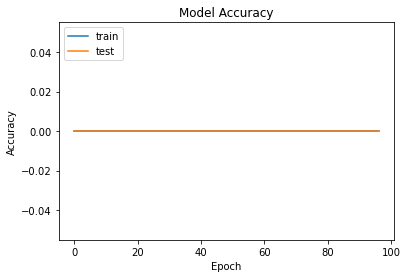

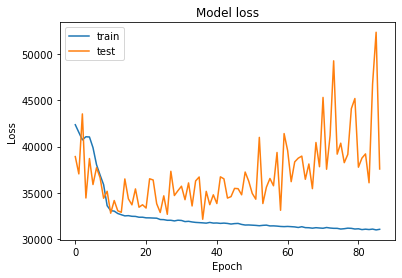

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'][10:])
plt.plot(history.history['val_loss'][10:])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/Users/michaelsong/Documents/GitHub/starzam/Results/5.7_training.png')
plt.show()

In [84]:
# model = tf.keras.models.load_model('/Users/michaelsong/Documents/GitHub/starzam/Models/m5.3')

# # Check its architecture
# model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              485376    
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dense_5 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               2

In [18]:
rand_data = np.empty((1,241))
for i in range(1610):
  try:
    rand_data = np.concatenate((rand_data,pd.read_csv('/Users/michaelsong/Documents/GitHub/starzam/Data_v5/'+str(i)+'.csv',delimiter=',').to_numpy()), axis=0)
  except:
    continue
rand_data = rand_data[1:].T[1:].T
print(rand_data.shape)
# pd.read_csv('/content/drive/MyDrive/Research - Yihong Song and Rohit Prasanna/Yihong/Data_v2/0.csv',delimiter=',').to_numpy

(215222, 240)


In [19]:
rand_x,rand_y = extract_xy(rand_data)

(215222, 236) (215222, 3)
(215222,)
[4751. 4751. 4751. ... 4834. 4834. 4834.]
[ 0.         14.90008455 15.50298007  5.21597451  0.90830632  6.20644851
  7.57179809 11.6459395   4.23234164  5.94067695  6.52288898  8.24150251
  8.24082509  3.0395033   6.79973021  4.53366015  0.3684131   3.1691568
  1.80376791  5.53454395 14.8961291   2.74725918  7.71266579  4.99388222
  2.06427727  1.78502294  2.54900389  1.96493493  2.57559828  1.92052474
  0.80277816  1.99947775  1.35893309  1.67625249  1.17480514  0.25672505
  0.31081051  1.21989282  1.70213929  1.20731647  0.93159443  0.81903248
  2.22338649  0.69065388  1.11967885  0.22592404  0.31651415  0.71181726
  0.17388933  0.66229278  1.18461127  1.10461002  0.83177554  1.0551641
  0.48302564  1.57553744  0.17964806  0.794371    0.86703197  0.45893159
  1.34795274  1.30622146  0.83207013  0.63664459  0.30800708  0.87276054
  0.45499416  0.83302011  1.15396698  0.35490575  0.63358948  0.33101004
  0.76273555  0.2994764   0.32217782  0.10424394

In [20]:
pred_test_y = model.predict(test_x).reshape(-1)
pred_train_y = model.predict(train_x).reshape(-1)
pred_rand_y = model.predict(rand_x).reshape(-1)
print(pred_test_y.shape,pred_train_y.shape)
print(pred_train_y)
print(train_y)

2022-01-10 12:21:53.026993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-10 12:21:58.658736: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


(85945,) (343776,)
[5002.6123 5069.969  4885.694  ... 5018.1743 5028.9873 4930.308 ]
[4990. 5012. 5090. ... 5145. 4924. 4820.]


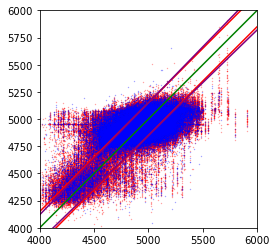

In [21]:
plt.scatter(train_y,pred_train_y, c='red', alpha=0.5,s=0.1)

plt.scatter(test_y,pred_test_y, c='blue', alpha=0.5,s=0.1)

# plt.scatter(rand_y,pred_rand_y, c='orange', alpha=0.5,s=0.1)


linex = np.linspace(4000, 6000)
liney = linex
lineytop = linex+150
lineybot = linex-150
lineytop2 = linex*1.03
lineybot2 = linex*0.97
# Create the plot
plt.plot(linex, liney,c="green")
plt.plot(linex, lineytop,c="red")
plt.plot(linex, lineybot,c="red")
plt.plot(linex, lineytop2,c="purple")
plt.plot(linex, lineybot2,c="purple")


plt.xlim(4000, 6000)
plt.ylim(4000, 6000)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('/Users/michaelsong/Documents/GitHub/starzam/Results/5.7.png')
plt.show()


In [22]:
def normalize1D(data):
    return np.divide(np.nan_to_num(data,np.nanmean(data)),np.nanmax(data))

In [23]:
mse = np.sqrt(mean_squared_error(normalize1D(test_y),normalize1D(pred_test_y)))
mae = mean_absolute_error(normalize1D(test_y),normalize1D(pred_test_y))
print("Mean Sq. Error, Mean Abs. Error")
print(mse,mae)

Mean Sq. Error, Mean Abs. Error
0.029412402 0.022741573


In [24]:
mse = np.sqrt(mean_squared_error(normalize1D(train_y),normalize1D(pred_train_y)))
mae = mean_absolute_error(normalize1D(train_y),normalize1D(pred_train_y))
print("Mean Sq. Error, Mean Abs. Error")
print(mse,mae)

Mean Sq. Error, Mean Abs. Error
0.06651364 0.061038475


In [25]:
mse = np.sqrt(mean_squared_error(normalize1D(rand_y),normalize1D(pred_rand_y)))
mae = mean_absolute_error(normalize1D(rand_y),normalize1D(pred_rand_y))
print("Mean Sq. Error, Mean Abs. Error")
print(mse,mae)

Mean Sq. Error, Mean Abs. Error
0.04377198936243973 0.03681477084403253


In [26]:
errormargin = 0.06
test_count = 0
for i in range(len(normalize1D(test_y))):
    if test_y[i]*(1-errormargin) <= pred_train_y[i] <= test_y[i]*(1+errormargin):
        test_count+= 1
train_count = 0
for i in range(len(normalize1D(train_y))):
    if train_y[i]*(1-errormargin) <= pred_train_y[i] <= train_y[i]*(1+errormargin):
        train_count+= 1
rand_count = 0
for i in range(len(normalize1D(rand_y))):
    if rand_y[i]*(1-errormargin) <= pred_rand_y[i] <= rand_y[i]*(1+errormargin):
        rand_count+= 1

print(test_count,len(test_y),train_count,len(train_y),rand_count,len(rand_y))
print(test_count/len(test_y),train_count/len(train_y),rand_count/len(rand_y))

64909 85945 316724 343776 197449 215222
0.7552388155215545 0.9213092246113749 0.9174201522149222


In [27]:
errormargin = 150
test_count = 0
for i in range(len(normalize1D(test_y))):
    if test_y[i]-errormargin <= pred_train_y[i] <= test_y[i]+errormargin:
        test_count+= 1
train_count = 0
for i in range(len(normalize1D(train_y))):
    if train_y[i]-errormargin <= pred_train_y[i] <= train_y[i]+errormargin:
        train_count+= 1
rand_count = 0
for i in range(len(normalize1D(rand_y))):
    if rand_y[i]-errormargin <= pred_rand_y[i] <= rand_y[i]+errormargin:
        rand_count+= 1

print(test_count,len(test_y),train_count,len(train_y),rand_count,len(rand_y))
print(test_count/len(test_y),train_count/len(train_y),rand_count/len(rand_y))

39105 85945 216552 343776 134684 215222
0.4550002908837047 0.6299218095504049 0.6257910436665397


# Testing

In [39]:
float(model.predict(all_data[i][3:121].reshape(-1,118)))

4707.60693359375

In [50]:
def testpred_avg(all_data):
    all_y = []
    pred_all_y = []
    kic = all_data[0][0]
    kic_y = []
    for i in range(len(all_data[:10000])):
        kic_y.append(float(model.predict(all_data[i][3:121].reshape(-1,118))))
        if(all_data[i][0]!=kic):
            kic = all_data[i][0]
            all_y.append(all_data[i][1])
            pred_all_y.append(sum(kic_y)/len(kic_y))
            kic_y = []

    return all_y,pred_all_y
all_y,pred_all_y = testpred_avg(all_data)

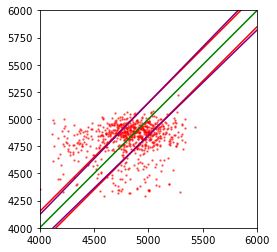

In [51]:
plt.scatter(all_y,pred_all_y, c='red', alpha=0.5,s=2)

linex = np.linspace(4000, 6000)
liney = linex
lineytop = linex+150
lineybot = linex-150
lineytop2 = linex*1.03
lineybot2 = linex*0.97
# Create the plot
plt.plot(linex, liney,c="green")
plt.plot(linex, lineytop,c="red")
plt.plot(linex, lineybot,c="red")
plt.plot(linex, lineytop2,c="purple")
plt.plot(linex, lineybot2,c="purple")


plt.xlim(4000, 6000)
plt.ylim(4000, 6000)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig('/Users/michaelsong/Documents/GitHub/starzam/Results/4.2.png')
plt.show()


In [52]:
mse = np.sqrt(mean_squared_error(normalize1D(all_y),normalize1D(pred_all_y)))
mae = mean_absolute_error(normalize1D(all_y),normalize1D(pred_all_y))
print("Mean Sq. Error, Mean Abs. Error")
print(mse,mae)

Mean Sq. Error, Mean Abs. Error
0.1390003082706839 0.13103416677353238
